<a href="https://colab.research.google.com/github/datadigger01/AI-Trade/blob/main/LDA_TopicModel_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install gensim
#!pip install --upgrade gensim

In [4]:
!pip install konlpy
!pip install pyLDAvis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:

# -*- coding: utf-8 -*-
"""LDA_TopicModel_ex.ipynb - Refactored Version

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1tUDAIYnixIXUc9gMm0VKGs4Zq_TjtiVb
"""

# ============================================
# 패키지 설치 및 임포트
# ============================================
# !pip install --upgrade gensim
# !pip install konlpy
# !pip install pyLDAvis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
import string
warnings.filterwarnings("ignore", category=DeprecationWarning, module='jupyter_client')

from gensim.parsing.preprocessing import preprocess_string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# 한국어 형태소 분석기
from konlpy.tag import Okt

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Topic Modeling
import gensim
from gensim import corpora, models
from gensim.models import TfidfModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

#### ============================================
#### 1. 데이터 로드
#### ============================================

In [6]:
# ============================================
# 1. 데이터 로드
# ============================================
print("=" * 60)
print("1. 데이터 로드 중...")
print("=" * 60)

df = pd.read_csv('https://raw.githubusercontent.com/datadigger01/AI-Trade/main/Data/trade_success_case_data.csv')
df['othbcDt'] = pd.to_datetime(df['othbcDt'])

print(f"전체 데이터 수: {len(df)}")

# bdtCntnt 컬럼 추출 및 결측치 제거
texts = df['bdtCntnt'].dropna().tolist()

print(f"유효한 텍스트 수: {len(texts)}")
print(f"평균 텍스트 길이: {np.mean([len(text) for text in texts]):.0f}자\n")

1. 데이터 로드 중...
전체 데이터 수: 194
유효한 텍스트 수: 194
평균 텍스트 길이: 2746자



#### ============================================
#### 2. 텍스트 전처리
#### ============================================

In [7]:
# ============================================
# 2. 텍스트 전처리
# ============================================
print("=" * 60)
print("2. 텍스트 전처리 중...")
print("=" * 60)

def combine_specific_words(text, word_pairs):
    """특정 단어 조합을 하나로 합치는 함수"""
    for word_pair in word_pairs:
        text = text.replace(word_pair, word_pair.replace(' ', ''))
    return text

def replace_specific_words(text, word_dict):
    """특정 단어를 다른 단어로 치환하는 함수"""
    for old_word, new_word in word_dict.items():
        text = text.replace(old_word, new_word)
    return text

def preprocess_korean_text(text):
    """한국어 텍스트 전처리"""
    if pd.isna(text):
        return ""

    # HTML 태그 제거
    text = re.sub(r'<[^>]*>', '', text)

    # E-mail 제거
    text = re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', '', text)

    # URL 제거
    text = re.sub(r'(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text)

    # 특수문자 제거 (한글, 영문, 공백만 유지)
    text = re.sub(r'[^가-힣a-zA-Z\s]', ' ', text)

    # 한글 자음, 모음 제거
    text = re.sub(r'([ㄱ-ㅎㅏ-ㅣ]+)', '', text)

    # 연속된 공백 제거
    text = re.sub(r'\s+', ' ', text)

    # 특수기호 제거
    text = re.sub(r'[^\w\s]', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 영어는 모두 대문자로 전환
    text = text.upper()

    # 특정 단어에 대한 변환, 조합 및 제거
    word_replacements = {
        'KOTRA': '코트라',
        '어플리케이션': '애플리케이션',
        '카메라': '캠코더',
    }
    text = replace_specific_words(text, word_replacements)

    # 특정 단어 조합을 먼저 결합
    word_pairs_to_combine = [
        '성공 사례',
        '중소 기업',
        '수출 전략',
        '시장 조사',
        '데이터 분석',
        '제품 개발',
        '생활 용품'
    ]
    text = combine_specific_words(text, word_pairs_to_combine)

    # 특정 단어 제거
    remove_words = [
        '바로가기',
        '성공사례',
        'RSQUO', 'LSQUO', 'LDQUO', 'RDQUO',
        '원문 슬기로운 코트라 활용법',
        '수출전문위원이 전하는 중소기업 수출성공스토리'
    ]
    for word in remove_words:
        text = text.replace(word, '')

    return text.strip()

# 전처리 적용
cleaned_texts = [preprocess_korean_text(text) for text in texts]
print("전처리 완료!\n")

2. 텍스트 전처리 중...
전처리 완료!



#### ============================================
#### 3. 한국어 형태소 분석 및 불용어 처리
#### ============================================

In [10]:
# ============================================
# 3. 한국어 형태소 분석 및 불용어 처리
# ============================================
print("=" * 60)
print("3. 형태소 분석기 설정...")
print("=" * 60)

# Okt 형태소 분석기 초기화
okt = Okt()
# kkma = Kkma()
# komoran = Komoran()
# hannanum = Hannanum()


# 한국어 불용어 리스트 (확장)
korean_stopwords = [
    '의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자',
    '에', '와', '한', '하다', '을', '를', '에서', '으로', '로', '에게', '의해', '까지',
    '수', '것', '등', '및', '그', '저', '것', '또', '또한', '더', '매우', '정말',
    '위해', '통해', '대한', '관한', '따라', '대해', '년', '월', '일', '개', '명', '곳'
]

def tokenize_korean(text):
    """한국어 토큰화 (명사 추출 및 불용어 제거)"""
    # 명사만 추출
    nouns = okt.nouns(text)
    # nouns = kkma.nouns(text)
    # nouns = komoran.nouns(text)
    # nouns = hannanum.nouns(text)

    # 불용어 제거 및 2글자 이상만 선택
    tokens = [noun for noun in nouns
              if noun not in korean_stopwords and len(noun) > 1]

    return tokens

print("형태소 분석기 설정 완료!\n")

3. 형태소 분석기 설정...
형태소 분석기 설정 완료!



#### ============================================
#### 4. 토큰화 적용
#### ============================================

In [11]:
# ============================================
# 4. 토큰화 적용
# ============================================
print("=" * 60)
print("4. 토큰화 진행 중...")
print("=" * 60)

# 전처리된 텍스트에 토큰화 적용
tokenized_docs = [tokenize_korean(text) for text in cleaned_texts]

print(f"토큰화 완료! 총 {len(tokenized_docs)}개 문서")
print(f"\n샘플 토큰화 결과:")
for i in range(min(3, len(tokenized_docs))):
    print(f"문서 {i}: {tokenized_docs[i][:10]}...")  # 처음 10개 토큰만 출력

4. 토큰화 진행 중...
토큰화 완료! 총 194개 문서

샘플 토큰화 결과:
문서 0: ['보아스', '테크', '향균', '유독가스', '분해', '효능', '신비', '광물', '라이트', '활용']...
문서 1: ['믹스', '컴퍼니', '대표', '피트니스', '센터', '피트니스', '센터', '운동', '단백질', '보충']...
문서 2: ['트롤', '굴삭기', '건설', '장비', '유압', '펌프', '모터', '건설', '중장', '비용']...


#### ============================================
#### 5. Dictionary 및 Corpus 생성
#### ============================================

In [ ]:
# ============================================
# 5. Dictionary 및 Corpus 생성
# ============================================
print("\n" + "=" * 60)
print("5. Dictionary 및 Corpus 생성 중...")
print("=" * 60)

# Dictionary 생성
dictionary = corpora.Dictionary(tokenized_docs)

# 극단적인 단어 필터링
print(f"필터링 전 단어 수: {len(dictionary)}")
dictionary.filter_extremes(
    no_below=5,      # 5개 미만 문서에 등장하는 단어 제거
    no_above=0.5,    # 전체 문서의 50% 이상에 등장하는 단어 제거
    keep_n=1500      # 최대 1000개 단어만 유지
)
print(f"필터링 후 단어 수: {len(dictionary)}")

# Corpus 생성
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# TF-IDF 모델 생성 (선택사항)
tfidf = TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]

print("Dictionary 및 Corpus 생성 완료!\n")


5. Dictionary 및 Corpus 생성 중...
필터링 전 단어 수: 7299
필터링 후 단어 수: 1518
Dictionary 및 Corpus 생성 완료!



In [ ]:
# ============================================
# 6. LDA 모델 학습
# ============================================
print("=" * 60)
print("6. LDA 모델 학습 중...")
print("=" * 60)

# LDA 모델 학습
num_topics = 5

lda_model = LdaModel(
    corpus=corpus,
    # corpus=corpus_tfidf,  # TF-IDF를 사용하려면 이 줄을 활성화
    num_topics=num_topics,
    id2word=dictionary,
    eta='auto',
    alpha='auto',
    iterations=50,
    passes=10,
    eval_every=10,
    per_word_topics=True,
    random_state=42  # 재현성을 위해 추가
)

print(f"\nLDA 모델 학습 완료! (토픽 수: {num_topics})\n")

# 토픽별 주요 단어 출력
print("=" * 60)
print("각 토픽의 주요 단어:")
print("=" * 60)
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"\n토픽 #{idx}:")
    print(topic)

6. LDA 모델 학습 중...

LDA 모델 학습 완료! (토픽 수: 5)

각 토픽의 주요 단어:

토픽 #0:
0.012*"부품" + 0.010*"산업" + 0.007*"환경" + 0.006*"에스" + 0.006*"러시아" + 0.006*"사절단" + 0.006*"원단" + 0.005*"제작" + 0.005*"품질" + 0.005*"코리아"

토픽 #1:
0.047*"비즈니스" + 0.047*"파트너" + 0.010*"경제" + 0.010*"유럽" + 0.009*"태국" + 0.009*"외교" + 0.008*"국가" + 0.008*"기회" + 0.007*"저희" + 0.006*"화장품"

토픽 #2:
0.013*"화장품" + 0.012*"브랜드" + 0.010*"마케팅" + 0.008*"마스크" + 0.007*"전시회" + 0.007*"발굴" + 0.007*"위원" + 0.007*"피부" + 0.007*"코리아" + 0.006*"지속"

토픽 #3:
0.014*"우리" + 0.011*"지사" + 0.010*"미국" + 0.008*"식품" + 0.007*"품질" + 0.007*"인증" + 0.006*"사용" + 0.005*"산업" + 0.005*"일본" + 0.005*"전시회"

토픽 #4:
0.012*"베트남" + 0.011*"위원" + 0.009*"아이" + 0.009*"기계" + 0.007*"엔지니어링" + 0.007*"전시회" + 0.006*"신규" + 0.006*"이후" + 0.006*"투자" + 0.006*"발굴"


In [ ]:
# ============================================
# 7. 모델 성능 평가
# ============================================
print("\n" + "=" * 60)
print("7. 모델 성능 평가...")
print("=" * 60)

# Perplexity (낮을수록 좋음)
perplexity = lda_model.log_perplexity(corpus)
print(f"Perplexity: {perplexity:.4f}")

# Coherence Score (높을수록 좋음)
coherence_model = CoherenceModel(
    model=lda_model,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.4f}")


7. 모델 성능 평가...
Perplexity: -6.7801
Coherence Score: 0.3162



8. pyLDAvis 시각화...

9. WordCloud 생성...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


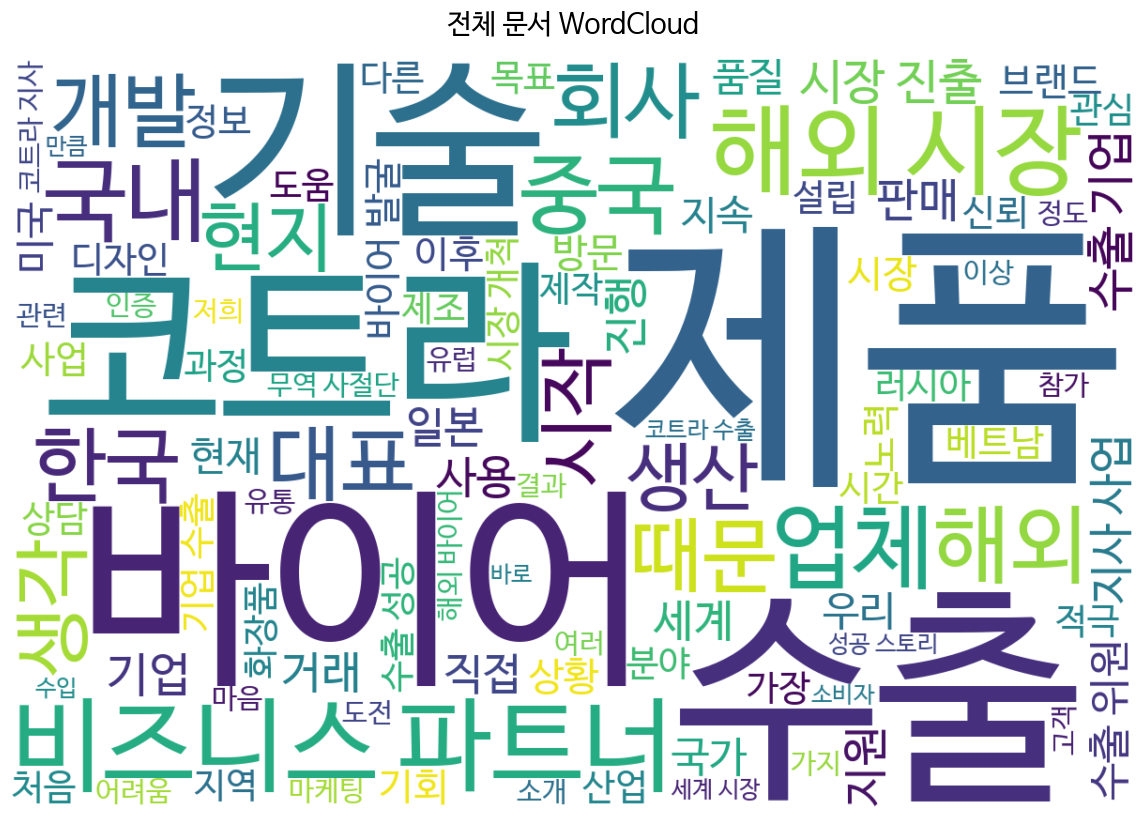

In [ ]:
# ============================================
# 8. pyLDAvis 시각화
# ============================================
print("\n" + "=" * 60)
print("8. pyLDAvis 시각화...")
print("=" * 60)

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(
    topic_model=lda_model,
    corpus=corpus,
    dictionary=dictionary,
    sort_topics=False
)

pyLDAvis.display(vis)

# HTML 파일로 저장 (선택사항)
# pyLDAvis.save_html(vis, 'lda_visualization.html')

# ============================================
# 9. WordCloud 생성
# ============================================
print("\n" + "=" * 60)
print("9. WordCloud 생성...")
print("=" * 60)

# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.font_manager as fm
from wordcloud import WordCloud

# 폰트 설정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rc('font', family='NanumBarunGothic')

# 모든 토큰을 하나의 문자열로 결합
all_words = [word for doc in tokenized_docs for word in doc]
words_string = ' '.join(all_words)

# WordCloud 생성
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    min_font_size=10,
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    max_words=100,
    relative_scaling=0.5,
    colormap='viridis'
).generate(words_string)

# WordCloud 시각화
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('전체 문서 WordCloud', fontsize=20, pad=20)
plt.tight_layout(pad=0)
plt.show()


10. 토픽별 WordCloud 생성...


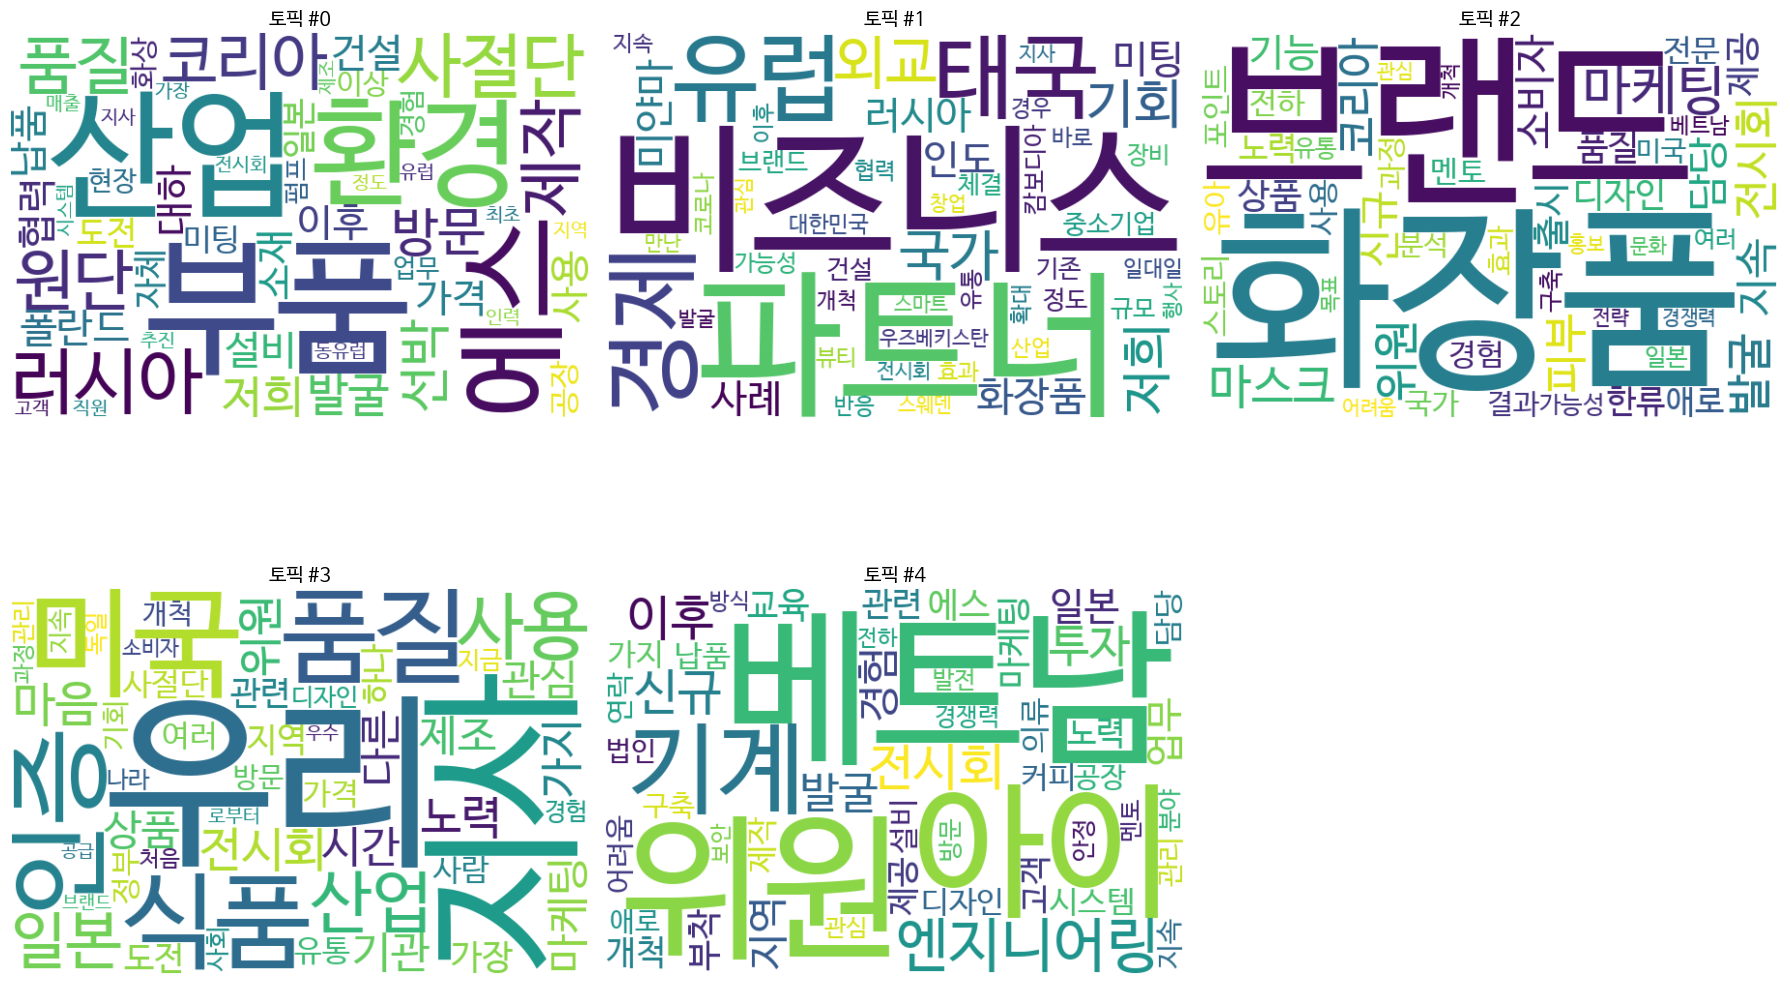

In [ ]:
# ============================================
# 10. 토픽별 WordCloud 생성 (선택사항)
# ============================================
print("\n" + "=" * 60)
print("10. 토픽별 WordCloud 생성...")
print("=" * 60)

# 토픽별 주요 단어 추출
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for topic_id in range(num_topics):
    # 해당 토픽의 단어-확률 딕셔너리 생성
    topic_words = dict(lda_model.show_topic(topic_id, topn=50))

    # WordCloud 생성
    wc = WordCloud(
        width=600,
        height=400,
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        colormap='viridis'
    ).generate_from_frequencies(topic_words)

    # 시각화
    axes[topic_id].imshow(wc, interpolation='bilinear')
    axes[topic_id].set_title(f'토픽 #{topic_id}', fontsize=14)
    axes[topic_id].axis('off')

# 빈 subplot 제거
if num_topics < len(axes):
    for i in range(num_topics, len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# ============================================
# 11. 문서별 토픽 분포 확인
# ============================================
print("\n" + "=" * 60)
print("11. 문서별 주요 토픽 분석...")
print("=" * 60)

def get_document_topics(lda_model, corpus, num_docs=5):
    """문서별 토픽 분포 확인"""
    results = []
    for idx in range(min(num_docs, len(corpus))):
        doc_topics = lda_model.get_document_topics(corpus[idx])
        # 가장 높은 확률의 토픽 찾기
        main_topic = max(doc_topics, key=lambda x: x[1])
        results.append({
            'doc_id': idx,
            'main_topic': main_topic[0],
            'probability': main_topic[1],
            'all_topics': doc_topics
        })
    return results

# 샘플 문서의 토픽 분포 확인
doc_topics_results = get_document_topics(lda_model, corpus, num_docs=10)

print("\n처음 10개 문서의 주요 토픽:")
for result in doc_topics_results:
    print(f"문서 {result['doc_id']}: "
          f"토픽 {result['main_topic']} "
          f"(확률: {result['probability']:.3f})")

print("\n" + "=" * 60)
print("LDA Topic Modeling 완료!")
print("=" * 60)


11. 문서별 주요 토픽 분석...

처음 10개 문서의 주요 토픽:
문서 0: 토픽 4 (확률: 0.578)
문서 1: 토픽 2 (확률: 0.445)
문서 2: 토픽 0 (확률: 0.998)
문서 3: 토픽 3 (확률: 0.763)
문서 4: 토픽 4 (확률: 0.997)
문서 5: 토픽 3 (확률: 0.998)
문서 6: 토픽 1 (확률: 0.736)
문서 7: 토픽 0 (확률: 0.521)
문서 8: 토픽 0 (확률: 0.608)
문서 9: 토픽 1 (확률: 0.999)

LDA Topic Modeling 완료!


In [ ]:
#import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary, sort_topics=False)
#vis = pyLDAvis.gensim_models.prepare(topic_model=lsimodel, corpus=corpus, dictionary=dictionary, sort_topics=False)


pyLDAvis.display(vis)

#lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
#pyLDAvis.save_html(lda_visualization, 'file_name.html')